<center><h1>Wang_Jason_HW2</h1></center>
<br>
<br>

Name: Jason Wang
<br>
Github Username: jasonwangg1321 
<br>
USC ID: 5363148736

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import normalize


Get the Cycle Power Plant Data Set

In [3]:
data = pd.read_excel('Folds5x2_pp.xlsx')
display(data)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


### (b) Exploring the data

#### i. rows and columns

We see that there are 9568 rows and 5 columns in this data set. The columns represent the features of the dataset, which consist of hourly average ambient variables Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant seem from the README file. The rows consist of the value points for each of the features for each inidividual data point.

#### ii. pairwise scatterplots of all the varianbles

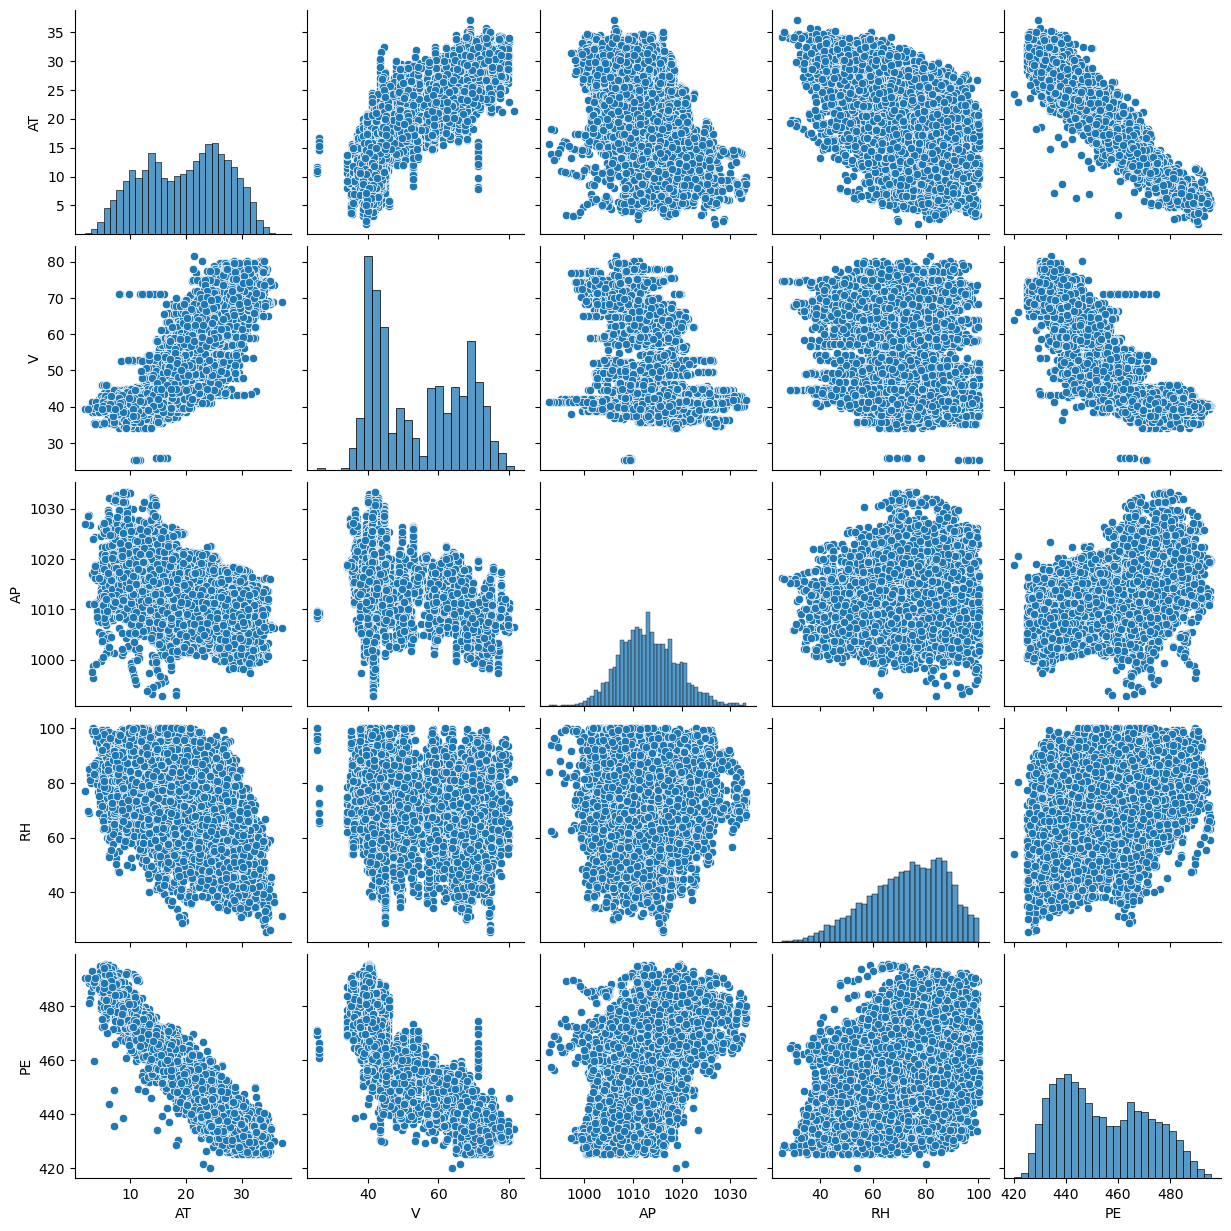

In [3]:
plot = sns.pairplot(data) #pairplot is used as it automatically plots the features against eachother, instead of having to specify each feature with a scatterplot
plt.show()

From the pairplot, in regards to PE and the predictors, we can see that there is somewhat of a negative association between PE and AT and PE and V. There doesn't seemingly to be a linear relationship between most of the predictors and PE. In addition, we can maybe assume there is not too strong of a relationship for PE between AP and RH as the variabules are extremely wide and round. 


#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [4]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


### (c) Simple Linear Regression

In [6]:
## Y is EP (PE) so we want predictors X = [AT, V, AP , RH]
# from ISLR code 
coefs = [] # for 1e
X = pd.DataFrame({'intercept': np.ones(data.shape[0]),'AT': data['AT']})
AT = X['AT']
y = data['PE']
print(y)
model = sm.OLS(y,X) #finds the values of the linear regression model that minimize the sum of squared residuals 
results = model.fit()
ATcoef = results.params[-1]
coefs.append(ATcoef)
print(results.summary())


0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: PE, Length: 9568, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Thu, 13 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:35:13   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
      

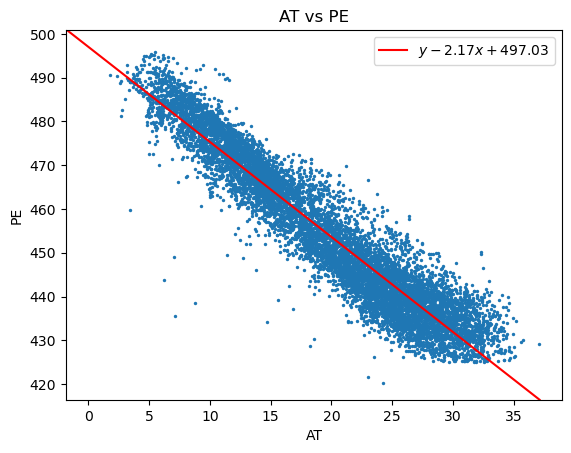

In [6]:
plt.scatter(AT,y, s=6, linewidth= 0)
m,b = np.polyfit(AT,y, deg = 1)
plt.axline(xy1= (0,b), slope = m, color = 'r', label = f'$y {m:.2f}x {b:+.2f}$') # https://stackoverflow.com/questions/19068862/how-to-overplot-a-line-on-a-scatter-plot-in-python
plt.legend()
plt.xlabel('AT')
plt.ylabel('PE')
plt.title('AT vs PE')
plt.show()


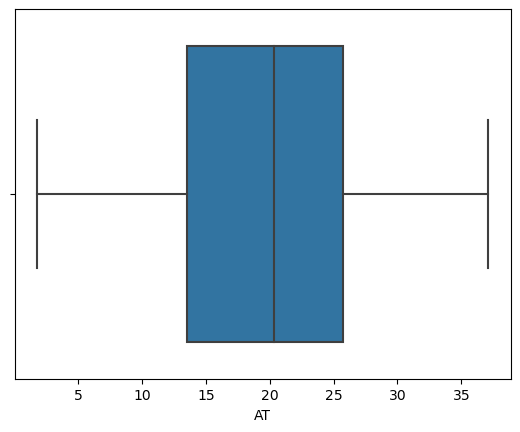

In [7]:
sns.boxplot(data = X, x= 'AT')
plt.show()

We can see there is an association between PE and AT with the low P-value. There are no outliers I would want to address looking at the boxplot.

In [8]:
# V vs PE
X = pd.DataFrame({'intercept': np.ones(data.shape[0]),'V': data['V']})
V = X['V']
y = data['PE']
model = sm.OLS(y,X) #finds the values of the linear regression model that minimize the sum of squared residuals 
results = model.fit()
Vcoef = results.params[-1]
coefs.append(Vcoef)
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:10:48   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    517.8015      0.378   1370.218      0.0

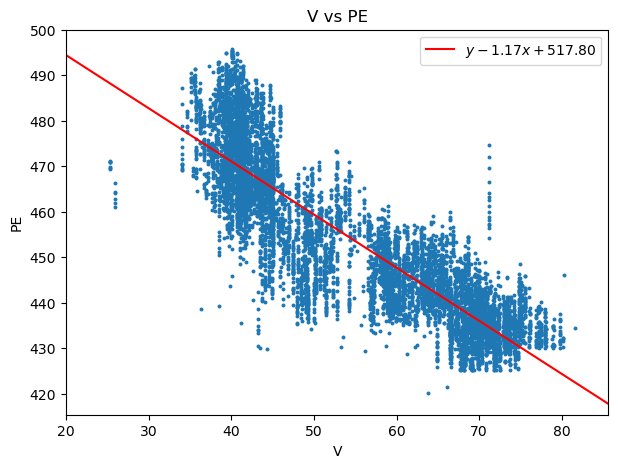

In [9]:
plt.figure(figsize=(7,5))
plt.scatter(V,y, s=8, linewidth= 0)
m,b = np.polyfit(V,y, deg = 1)
plt.axline(xy1= (0,b), slope = m, color = 'r', label = f'$y {m:.2f}x {b:+.2f}$')
plt.xlim(left=20)
plt.ylim(top = 500)
plt.legend()
plt.xlabel('V')
plt.ylabel('PE')
plt.title('V vs PE')
plt.show()


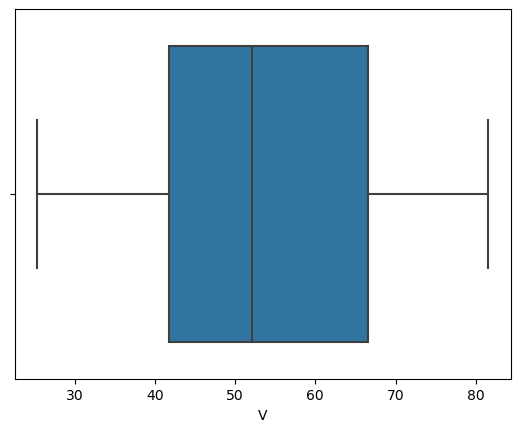

In [10]:
sns.boxplot(data = X, x= 'V')
plt.show()

We can see there is an association between PE and V with the low P-value. There are no outliers I would want to address looking at the boxplot.

In [11]:
# AP vs PE
X = pd.DataFrame({'intercept': np.ones(data.shape[0]),'AP': data['AP']})
AP = X['AP']
y = data['PE']
model = sm.OLS(y,X) #finds the values of the linear regression model that minimize the sum of squared residuals 
results = model.fit()
APcoef = results.params[-1]
coefs.append(APcoef)
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:10:48   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1055.2610     25.459    -41.449      0.0

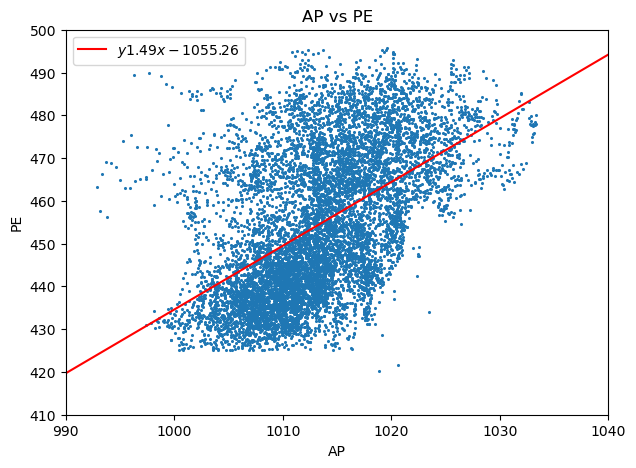

In [12]:
plt.figure(figsize=(7,5))
plt.scatter(AP,y, s=5, linewidth= 0)
m,b = np.polyfit(AP,y, deg = 1)
plt.axline(xy1= (0,b), slope = m, color = 'r', label = f'$y {m:.2f}x {b:+.2f}$')
plt.xlim(left=990, right = 1040)
plt.ylim(bottom = 410, top = 500)
plt.legend()
plt.xlabel('AP')
plt.ylabel('PE')
plt.title('AP vs PE')
plt.show()


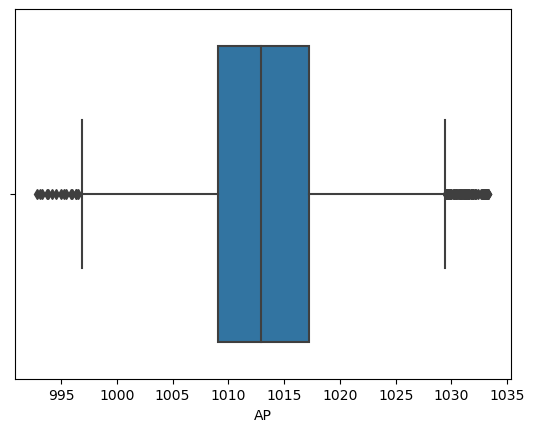

In [13]:
sns.boxplot(data = X, x= 'AP')
plt.show()

We can see there is an association between PE and AP with the low P-value. There are outliers I want to address, where 997 < AP > 1030.

In [14]:
# RH vs PE
X = pd.DataFrame({'intercept': np.ones(data.shape[0]),'RH': data['RH']})
RH = X['RH']
y = data['PE']
model = sm.OLS(y,X) #finds the values of the linear regression model that minimize the sum of squared residuals 
results = model.fit()
RHcoef = results.params[-1]
coefs.append(RHcoef)
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:10:49   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    420.9618      0.823    511.676      0.0

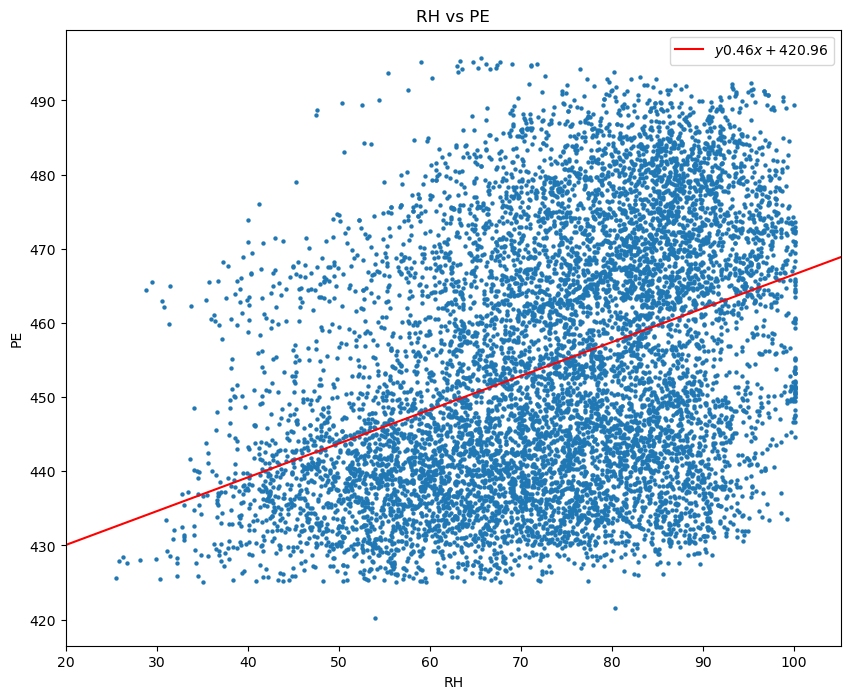

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(RH,y, s=10, linewidth= 0)
m,b = np.polyfit(RH,y, deg = 1)
plt.axline(xy1= (0,b), slope = m, color = 'r', label = f'$y {m:.2f}x {b:+.2f}$')
plt.xlim(left=20)
plt.legend()
plt.xlabel('RH')
plt.ylabel('PE')
plt.title('RH vs PE')
plt.show()


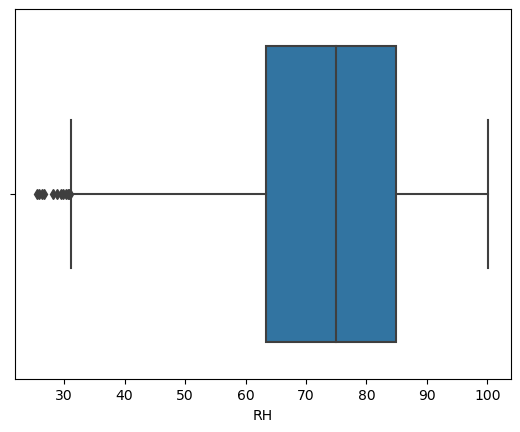

In [16]:
sns.boxplot(data = X, x= 'RH')
plt.show()

We can see there is an association between PE and RH with the low P-value. There are outliers I would want to address looking at the boxplot, where RH < 32.

### (d) Multiple Regression

In [17]:
mr_coefs = [] # for 1e

terms = data.drop(columns=['PE'])
X = terms
X = sm.add_constant(X)
model1 = sm.OLS(y,X)
results1 = model1.fit()
reg_coefs = results1.params[1:]
mr_coefs.append(reg_coefs)
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:10:49   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

From this multiple regression model, we would reject the null hypothesis as the P values for all predictors are 0, which is less than the significance value of 0.5.

### (e) 1c Compare to 1d

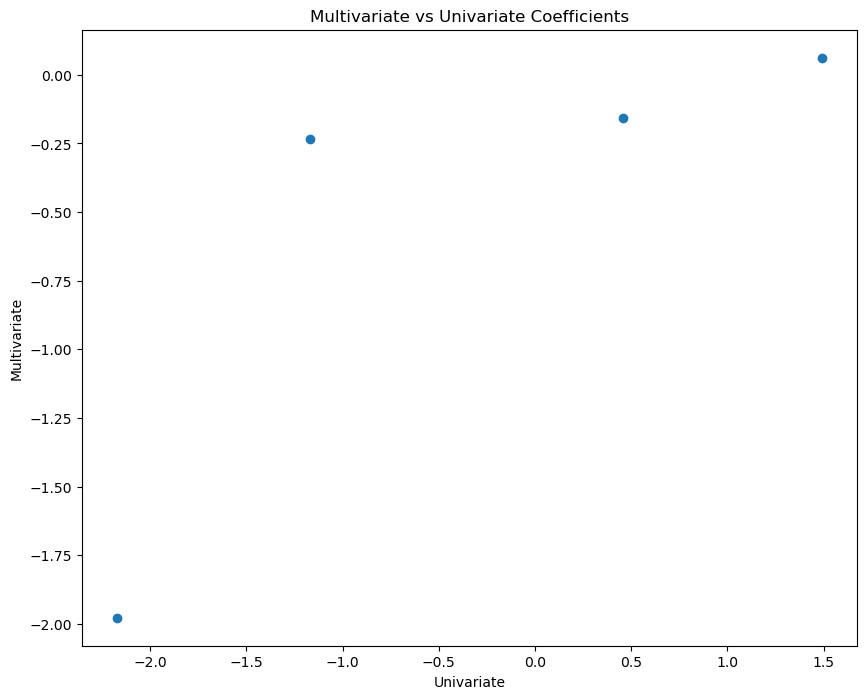

In [18]:
#That is, each predictor is
#displayed as a single point in the plot. Its coefficient in a simple linear regression
#model is shown on the x-axis, and its coefficient estimate in the multiple linear
#regression model is shown on the y-axis. MVR: -1.9775, -0.2339, 0.0621, -0.1581

plt.figure(figsize=(10,8))
plt.scatter(coefs,mr_coefs)
plt.xlabel('Univariate')
plt.ylabel('Multivariate')
plt.title('Multivariate vs Univariate Coefficients')
plt.show()

AT V RH AP is the order.
We can see that for the univariate and multivariate coefficients, AT was the only coefficient that was similar in both the univariate and multivariate regression at around -2. For the other coefficients, we can see V is much more negative than the multivariate (-1.17) compared to -0.2339. Suprisingly, RH was positive in the univariate model but negative in the multivariate model. Lastly, AP was much larger in the univariate model with a coef of 1.5 while it was 0.06 in the multivariate model.

### (f) Nonlinear Association

In [19]:
X = pd.DataFrame({'intercept': np.ones(data.shape[0]),'AT': data['AT']})
AT = X[['AT']]
y = data[['PE']]
# Y= B_0 + B_1X + B_2X^2 + B_3X^3 + E
poly = PolynomialFeatures(3) # from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
AT2 = poly.fit_transform(AT)
model2 = sm.OLS(y,AT2)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:10:49   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

From lecture, we know that H_0: B_1 = B_2 = B_3 = 0 and H_1: Not all three of B_1,B_2,B_3 are zero. We can also look at F Statistic to determine significance of the model. In this case, where the coef are not 0 with p values all at 0, we reject the null hypothesis.

In [20]:
X = pd.DataFrame({'intercept': np.ones(data.shape[0]),'V': data['V']})
V = X[['V']]
y = data[['PE']]
poly = PolynomialFeatures(3) # from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
V2 = poly.fit_transform(V)
model2 = sm.OLS(y,V2)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:10:49   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

From lecture, we know that H_0: B_1 = B_2 = B_3 = 0 and H_1: Not all three of B_1,B_2,B_3 are zero. In this case, where not all coef are not 0, we reject the null hypothesis.

In [21]:
X = pd.DataFrame({'intercept': np.ones(data.shape[0]),'AP': data['AP']})
AP = X[['AP']]
y = data[['PE']]
poly = PolynomialFeatures(3) # from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
AP2 = poly.fit_transform(AP)
model2 = sm.OLS(y,AP2)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:10:49   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

From lecture, we know that H_0: B_1 = B_2 = B_3 = 0 and H_1: Not all three of B_1,B_2,B_3 are zero. We can also look at F Statistic to determine significance of the model. In this case, where not all coef are not 0 and all p value are 0, we reject the null hypothesis.

In [22]:
X = pd.DataFrame({'intercept': np.ones(data.shape[0]),'RH': data['RH']})
RH = X[['RH']]
y = data[['PE']]
poly = PolynomialFeatures(3) # from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
RH2 = poly.fit_transform(RH)
model2 = sm.OLS(y,RH2)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:10:49   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

From lecture, we know that H_0: B_1 = B_2 = B_3 = 0 and H_1: Not all three of B_1,B_2,B_3 are zero. We can also look at F Statistic to determine significance of the model. In this case, where not all coef are not 0 and p values are all 0, we reject the null hypothesis.

### (g) Interactions of Predictors

In [23]:
terms = data.drop(columns=['PE'])
X = terms
# all pairwise interaction terms, interaction_only sets only interaction features to be produced
poly= PolynomialFeatures(interaction_only= True) #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
X = poly.fit_transform(X)
model3 = sm.OLS(y,X)
results3 = model3.fit()
print(results3.summary())

feature_names = poly.get_feature_names_out()
print("Combined features:", feature_names)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:10:49   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

We can see that AT,AP has a p value of 0.452, which is also greater than 0.05. The interaction between V,RH also has a p value of 0.086. From this, we can see the interaction term x6 and x9 are statistically insignificant while all other interactions are statistically significant.

### (h) Improvement

In [24]:
# using train_test_split to split into test and training sets 
terms = data.drop(columns=['PE'])
x_training, x_test = train_test_split(terms, train_size = 0.7, random_state=1) #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
y_training, y_test = train_test_split(y, train_size= 0.7, random_state= 1)
x_training_cons = sm.add_constant(x_training)
x_test_cons = sm.add_constant(x_test)
model4 = sm.OLS(y_training,x_training_cons)
results4 = model4.fit()
# training the regression model on a randomly selected 70% subset of data w/ ALL predictors
training_prediction = results4.predict(x_training_cons)
test_prediction = results4.predict(x_test_cons)

#To find MSEs https://www.geeksforgeeks.org/python-mean-squared-error/
training_mse = mean_squared_error(y_training, training_prediction)
test_mse = mean_squared_error(y_test, test_prediction)

print(f'{training_mse} is the training mse')
print(f'{test_mse} is the test mse')


20.766119761450938 is the training mse
20.77747810688443 is the test mse


In [25]:
# Running regression model involving all possible interaction terms and quadratic nonlinearities (remove insignifcant variables using p-values)
poly = PolynomialFeatures(2, interaction_only= True)
fitted_x_training = poly.fit_transform(x_training)
fitted_x_testing = poly.fit_transform(x_test)
model5 = sm.OLS(y_training, fitted_x_training)
results5 = model5.fit()

print(results5.summary())
feature_names = poly.get_feature_names_out()
# V,RH - AT,AP

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     9792.
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:10:49   Log-Likelihood:                -19277.
No. Observations:                6697   AIC:                         3.858e+04
Df Residuals:                    6686   BIC:                         3.865e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        650.8953     93.550      6.958      0.0

In [26]:
for i,k in enumerate(feature_names):
    print(i,k)
# Removing x6, x9

0 1
1 AT
2 V
3 AP
4 RH
5 AT V
6 AT AP
7 AT RH
8 V AP
9 V RH
10 AP RH


In [27]:
x_training_removed = np.delete(fitted_x_training,[6,9],axis = 1)
x_testing_removed = np.delete(fitted_x_testing, [6,9], axis = 1)
model6 = sm.OLS(y_training, x_training_removed)
results6 = model6.fit()
print(results6.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.224e+04
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:10:49   Log-Likelihood:                -19278.
No. Observations:                6697   AIC:                         3.857e+04
Df Residuals:                    6688   BIC:                         3.864e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        631.5948     90.859      6.951      0.0

In [28]:
fitted_training_prediction = results6.predict(x_training_removed)
fitted_test_prediction = results6.predict(x_testing_removed)

fitted_training_mse = mean_squared_error(y_training, fitted_training_prediction)
fitted_test_mse = mean_squared_error(y_test, fitted_test_prediction)
print(f'{fitted_training_mse} is the training mse')
print(f'{fitted_test_mse} is the test mse')

18.52810665061232 is the training mse
18.635381877229232 is the test mse


We can see that the new model after removing insignificant interactions has a lower MSE for both training and test (18.5, 18.6) respectively while they were (20.8) before removing the insignificant variables.

### (i) KNN

In [29]:
k_val = list(range(1,101,1))
training_errors = []
testing_errors = []

for i, k in enumerate(k_val):
    knn = KNeighborsRegressor(n_neighbors= k)
    knn.fit(x_training, y_training)
    x_training_pred = knn.predict(x_training)
    x_testing_pred = knn.predict(x_test)
    training_errors.append(mean_squared_error(y_training,x_training_pred))
    testing_errors.append(mean_squared_error(y_test, x_testing_pred))
                        

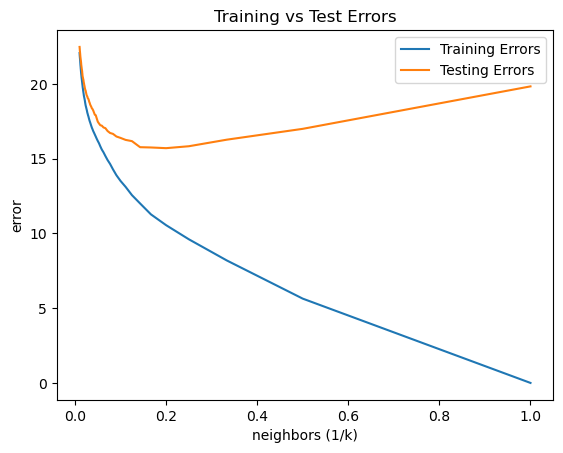

In [30]:
inv_k = []
for val in k_val:
    inv_k.append(1/val)

plt.plot(inv_k, training_errors, label = 'Training Errors')
plt.plot(inv_k, testing_errors, label = 'Testing Errors')
plt.title('Training vs Test Errors')
plt.xlabel('neighbors (1/k)')
plt.ylabel('error')
plt.legend()
plt.show()



In [31]:
testing_min_val = (min(testing_errors))
testing_min_k = [i for i, k in enumerate(testing_errors) if k == testing_min_val]
print(f"The smallest testing error in the list is {testing_min_val} at indices  k = {testing_min_k}.")

The smallest testing error in the list is 15.704821203761764 at indices  k = [4].


In [32]:
# https://scikit-learn.org/stable/modules/preprocessing.html
normalized_x_training = normalize(x_training, norm = 'l2')
normalized_x_test = normalize(x_test, norm = 'l2')

In [33]:
k_val = list(range(1,101,1))
normalized_training_errors = []
normalized_testing_errors = []

for i, k in enumerate(k_val):
    knn = KNeighborsRegressor(n_neighbors= k)
    knn.fit(normalized_x_training, y_training)
    normalized_x_training_pred = knn.predict(normalized_x_training)
    normalized_x_testing_pred = knn.predict(normalized_x_test)
    normalized_training_errors.append(mean_squared_error(y_training,normalized_x_training_pred))
    normalized_testing_errors.append(mean_squared_error(y_test, normalized_x_testing_pred))
                        

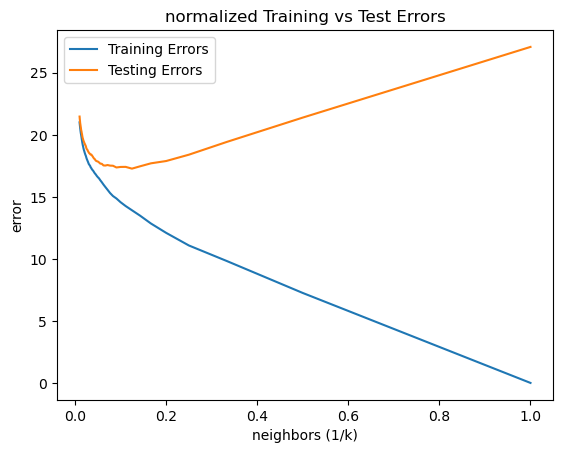

In [34]:
inv_k = []
for val in k_val:
    inv_k.append(1/val)

plt.plot(inv_k, normalized_training_errors, label = 'Training Errors')
plt.plot(inv_k, normalized_testing_errors, label = 'Testing Errors')
plt.title('normalized Training vs Test Errors')
plt.xlabel('neighbors (1/k)')
plt.ylabel('error')
plt.legend()
plt.show()



In [35]:
normalized_testing_min_val = (min(normalized_testing_errors))
normalized_testing_min_k = [i for i, k in enumerate(normalized_testing_errors) if k == normalized_testing_min_val]
print(f"The smallest normalized testing error in the list is {normalized_testing_min_val} at indices  k = {normalized_testing_min_k}.")


The smallest normalized testing error in the list is 17.272750245994434 at indices  k = [7].


### (j ) Compare KNN and Linear

In [36]:
print(f"The smallest testing error in the list is {testing_min_val} at indices  k = {testing_min_k}.")
print(f"The smallest normalized testing error in the list is {normalized_testing_min_val} at indices  k = {normalized_testing_min_k}.")
print(f'{test_mse} is the test mse with all variables')
print(f'The {fitted_test_mse} is the test mse with statistically insignificant variables removed \n')

print(f'We can see that the lowest MSE I got was with an unnormalized knn regression model at 15.704. KNN regression model provided less error than linear regression model likely due to the fact \n\
knn can better deal with non-l;linear data and is more flexible. Linear regression models are also less flexible and can be more sensitive to outliers in the dataset. ')

The smallest testing error in the list is 15.704821203761764 at indices  k = [4].
The smallest normalized testing error in the list is 17.272750245994434 at indices  k = [7].
20.77747810688443 is the test mse with all variables
The 18.635381877229232 is the test mse with statistically insignificant variables removed 

We can see that the lowest MSE I got was with an unnormalized knn regression model at 15.704. KNN regression model provided less error than linear regression model likely due to the fact 
knn can better deal with non-l;linear data and is more flexible. Linear regression models are also less flexible and can be more sensitive to outliers in the dataset. 


## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

I would use a more flexible method in this case if the sample size is extremely large and the number of predictors small. Since the number of predictors are small with n being large, I would assume that variance wouldn't be as large as small changes in the data should not impact the data set as a whole, resulting in a lower error. One of the downsides of a flexible method is computation cost, but since the number of predictors is small, this also would not be as big as an issue. As stated in lecture, there are trade-offs in machine learning where some models/algorithms may not scale to large data sets.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

This would be the opposite of the above. Since number of observations n is small, variance can be much larger as changes in the dataset can impact the data set to a much higher degree. I would not use a flexible method in this case as it would be extremely expensive to compute a large number of predictors in a model. As stated in lecture, cost can be exponential. An inflexible method would be better suited to this case.

### (c) The relationship between the predictors and response is highly non-linear.

In this case, I would use a flexible method because an inflexible method would not capture the relationship of the data. As we saw for this homework, knn performed better than the linear regression model likely due to the non-linearity in data. Using a flexible method would allow the model to perform better and see the relationship between the predictors and response.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

If variance of error terms is extremely high, I would use an inflexible model. There must be a lot of noise in the data so we don't want a flexible model in which it captures all the noise and outliers in the data. It could also be computationally expensive to use a flexible model in this case.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

The distance for obs 1 would be: sqrt(0^2 + 3^2 + 0^2) = 3
The distance for obs 2 would be: sqrt(2^2 + 0^2 + 0^2) = 2
The distance for obs 3 would be: sqrt(0^2 + 1^2 + 3^2) = sqrt(10)
The distance for obs 4 would be: sqrt(0^2 + 1^2 + 2^2) = sqrt(5)
The distance for obs 5 would be: sqrt(-1^2 + 0^2 + 1^2) = sqrt(2)
The distance for obs 6 would be: sqrt(1^2 + 1^2 + 1^2) = sqrt(3)

### (b) What is our prediction with K = 1? Why?

The prediction at K = 1 would be green because the closest neighbor X_5 (sqrt(2)) is green.

### (c) What is our prediction with K = 3? Why?

The prediction at K = 3 would be green because the three closest neighbors are X_4, X_5, X_6. Two of the three are green so the prediction would also be green.

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

If the bayes decision boundary in this problem is highly non-linear, we would expect the best value for K to be small. As we discussed in class, as K increases there is low variance and high bias. When K is small, there is high variance and low bias. If the problem is highly non-linear, a large k could lead to a smoother decision boundary, leading to underfitting the model. Because of this, we would want to choose a small k which would allow for a more flexible model, prone to capturing the relationhip of the highly non-linear relationships.